## Задание 1 ##
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [2]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import datasets
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
from IPython.display import HTML


boston = datasets.load_boston()
X = pd.DataFrame(data = boston.data, columns = boston.feature_names)
y = pd.DataFrame(data = boston.target,columns = ['Target'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Так как во втором задании мы разбиваем выборку на 3 кластера, то почему бы не преминить преобразование пространства сведя размерность к трём, а не двум. Тем более, что рисовать 3D графики куда интереснее )) ####

In [4]:
tsne = TSNE(n_components = 3, learning_rate=250,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_TSNE = tsne.fit_transform(X_train_scaled)


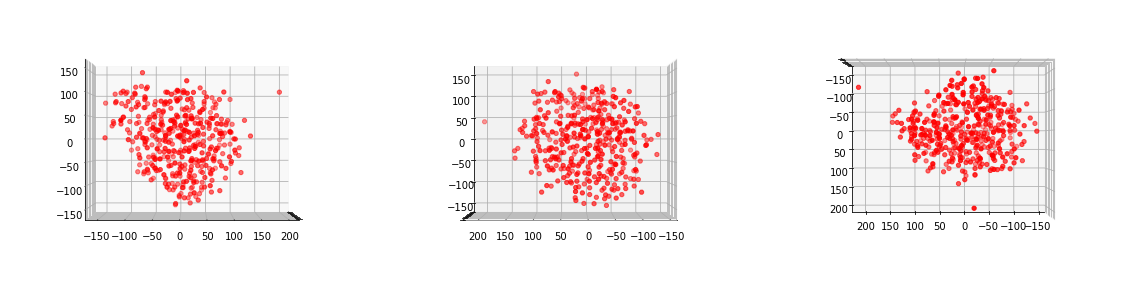

In [5]:
fig = plt.figure(figsize=plt.figaspect(0.3))
ax = fig.add_subplot(131, projection='3d')
ax.elev, ax.azim = 0, 0
ax.set_xticklabels([])
ax.scatter(X_train_TSNE[:,0],X_train_TSNE[:,1], X_train_TSNE[:,2], c='r', marker='8')
ax2 = fig.add_subplot(132, projection='3d')
ax2.set_yticklabels([])
ax2.elev, ax2.azim = 0, 90
ax2.scatter(X_train_TSNE[:,0],X_train_TSNE[:,1], X_train_TSNE[:,2], c='r', marker='8')
ax3 = fig.add_subplot(133, projection='3d')
ax3.set_zticklabels([])
ax3.elev, ax3.azim = 90, 90
ax3.scatter(X_train_TSNE[:,0],X_train_TSNE[:,1], X_train_TSNE[:,2], c='r', marker='8')
fig.set_size_inches(20,5)
plt.subplots_adjust(wspace=0.05,hspace=0.3)
plt.show()

#### Рассматривая выборку в трёх плоскостях, не наблюдается какой-то явно видимой кластеризации. Возможно мы что-то упускаем, давайте посмотрим на выборку со всех сторон используя анимацию ####

In [6]:
%%capture
fig1 = plt.figure(figsize=plt.figaspect(0.3))
ax = fig1.add_subplot(111,projection='3d')
fig1.set_size_inches(10,5)
ax.scatter(X_train_TSNE[:,0],X_train_TSNE[:,1], X_train_TSNE[:,2], color='r', marker='8')
plt.axis('off')

In [7]:
ax.elev = -180
ax.azim = 0
def animate(i):
    if ax.elev==180:
        pass
    elif ax.azim == 360:
        ax.elev += 5
    else:
        ax.azim += 5
    return (ax,)
anim = animation.FuncAnimation(fig1, animate,frames=175, interval=100, blit=False)
HTML(anim.to_html5_video())

#### Даже с использованием анимации не наблюдается каких-либо явно наблюдаемых кластеров. ####

## Задание 2 ##
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state = 42)
labels_train = kmeans.fit_predict(X_train_scaled)

In [9]:
%%capture
fig1 = plt.figure(figsize=plt.figaspect(0.3))
ax = fig1.add_subplot(111,projection='3d')
fig1.set_size_inches(10,5)
ax.scatter(X_train_TSNE[:,0],X_train_TSNE[:,1], X_train_TSNE[:,2], c=labels_train, marker='8')
plt.axis('off')

In [10]:
ax.elev = -180
ax.azim = 0
def animate(i):
    if ax.elev==180:
        pass
    elif ax.azim == 360:
        ax.elev += 5
    else:
        ax.azim += 5
    return (ax,)
anim = animation.FuncAnimation(fig1, animate,frames=175, interval=100, blit=False)
HTML(anim.to_html5_video())

In [12]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

CRIM = [X_train['CRIM'][labels_train == i].mean() for i in range(0,3) ]
price = [float(y_train[labels_train == i].mean()) for i in range(0,3) ]
pd.DataFrame(data=[CRIM,price],columns=['Кластер 1','Кластер 2','Кластер 3'], index=['CRIM','price'])

,Кластер 1,Кластер 2,Кластер 3
CRIM,0.073566,10.797028,0.421660
price,27.788372,16.165354,24.958115


## Задание 3 * ##
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [13]:
labels_test = kmeans.fit_predict(X_test_scaled)

CRIM = [X_test['CRIM'][labels_test == i].mean() for i in range(0,3) ]
price = [float(y_test[labels_test == i].mean()) for i in range(0,3) ]
pd.DataFrame(data=[CRIM,price],columns=['Кластер 1','Кластер 2','Кластер 3'], index=['CRIM','price'])

,Кластер 1,Кластер 2,Кластер 3
CRIM,0.086186,0.252007,10.165531
price,33.871429,21.552830,16.437143
